In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analisis general del dataset

In [3]:
# Abro el dataframe con pandas
df = pd.read_csv("./AbandonoDeClientes.csv")

# Muestro 5 filas al azar
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8895,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
8256,8257,15768574,Anderson,671,Spain,Male,58,1,178713.98,1,1,1,21768.21,0
9424,9425,15666200,Lombardo,689,France,Female,40,1,0.00,2,1,1,119446.64,0
5498,5499,15726774,Field,563,France,Male,35,3,106250.72,1,0,0,39546.32,0
2385,2386,15728352,Yermakov,623,France,Male,27,4,120509.81,1,0,0,142170.44,0


In [9]:
# Muestro información sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Muestro una descripción sobre las columnas del dataframe
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Muestro los valores nulos del dataframe
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Muestro los valores duplicados del dataframe
df.duplicated().sum()

0

### Analisis en profundidad

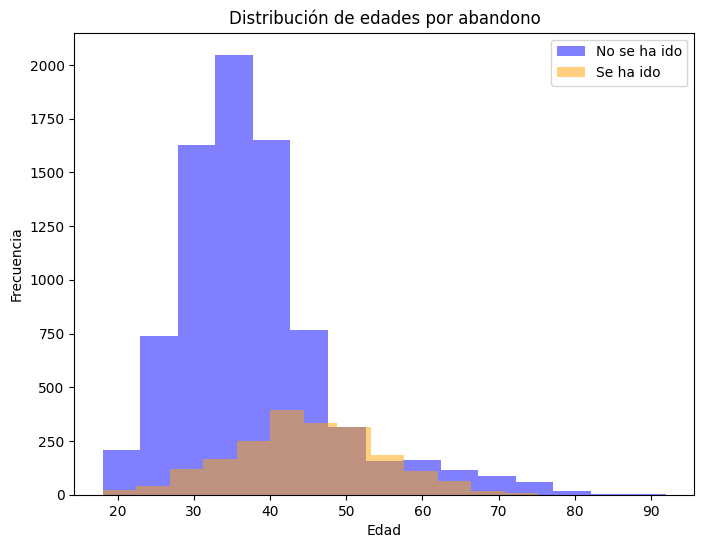

In [6]:
# Filtro las edades segun la columna Exited
age_exited_0 = df[df['Exited'] == 0]['Age']
age_exited_1 = df[df['Exited'] == 1]['Age']

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(age_exited_0, bins=15, alpha=0.5, label='No se ha ido', color='blue')
plt.hist(age_exited_1, bins=15, alpha=0.5, label='Se ha ido', color='orange')
plt.title("Distribución de edades por abandono")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


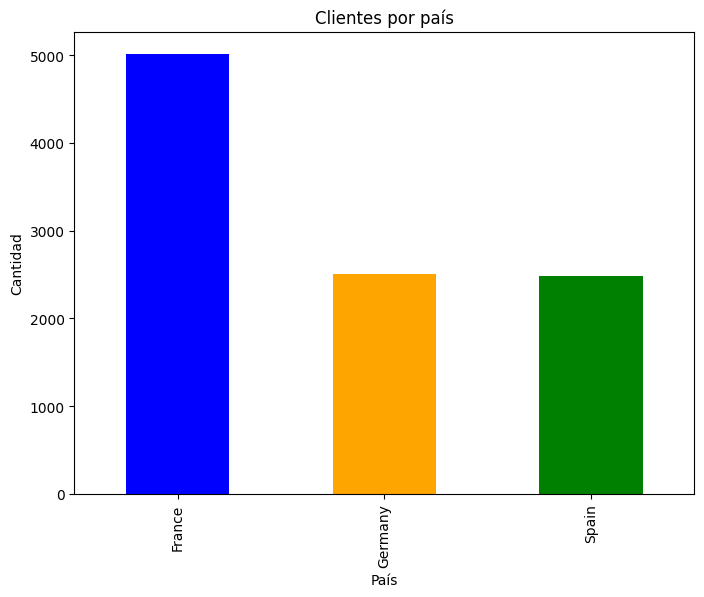

In [24]:
# Barplot
plt.figure(figsize=(8, 6))
df['Geography'].value_counts().plot(kind='bar',color=['blue', 'orange', 'green'])
plt.title('Clientes por país')
plt.xlabel('País',)
plt.ylabel('Cantidad')
plt.show()


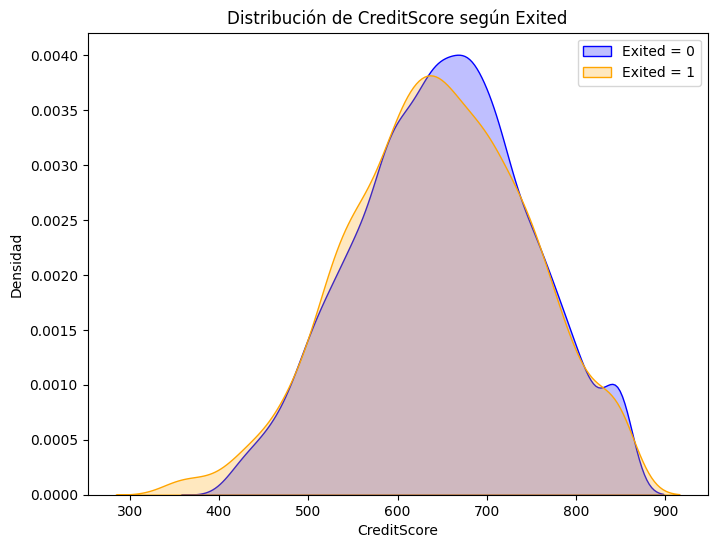

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Exited'] == 0]['CreditScore'], label='Exited = 0', fill=True, color='blue')
sns.kdeplot(df[df['Exited'] == 1]['CreditScore'], label='Exited = 1', fill=True, color='orange')
plt.title('Distribución de CreditScore según Exited')
plt.xlabel('CreditScore')
plt.ylabel('Densidad')
plt.legend()
plt.show()



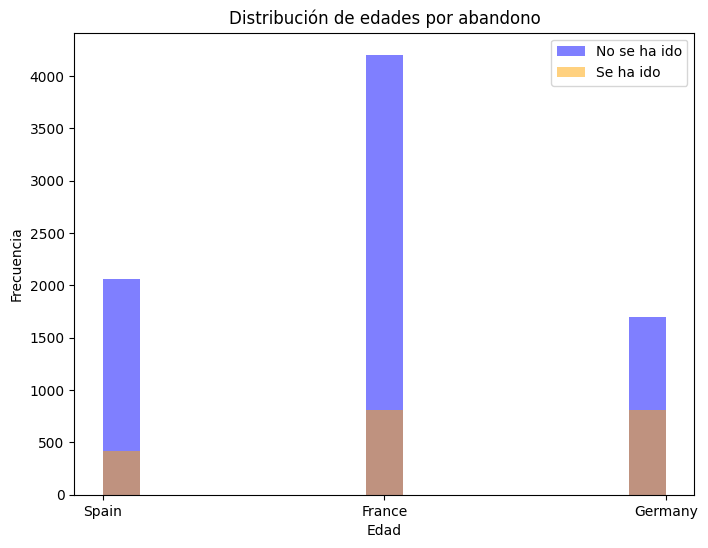

In [ ]:
# Filtro los paises segun la columna Exited
country_exited_0 = df[df['Exited'] == 0]['Geography']
country_exited_1 = df[df['Exited'] == 1]['Geography']

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(country_exited_0, bins=15, alpha=0.5, label='No se ha ido', color='blue')
plt.hist(country_exited_1, bins=15, alpha=0.5, label='Se ha ido', color='orange')
plt.title("Distribución de país por abandono")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

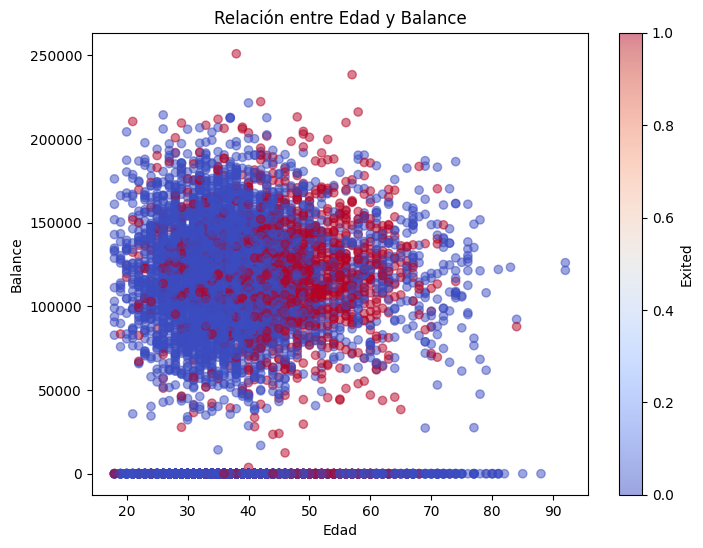

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Balance'], alpha=0.5, c=df['Exited'], cmap='coolwarm', label='Exited')
plt.title('Relación entre Edad y Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.colorbar(label='Exited')
plt.show()


C:\Users\daant\AppData\Local\Temp\ipykernel_12516\1972752467.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], label='Exited = 0', shade=True)
C:\Users\daant\AppData\Local\Temp\ipykernel_12516\1972752467.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], label='Exited = 1', shade=True)


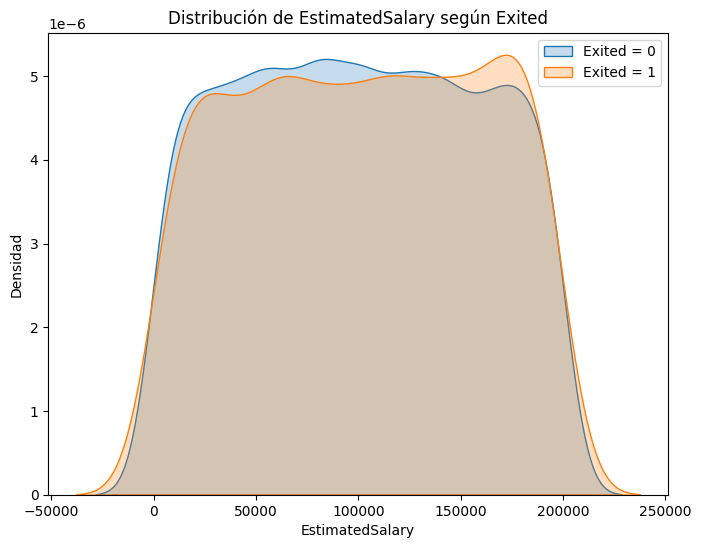

In [27]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], label='Exited = 0', shade=True)
sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], label='Exited = 1', shade=True)
plt.title('Distribución de EstimatedSalary según Exited')
plt.xlabel('EstimatedSalary')
plt.ylabel('Densidad')
plt.legend()
plt.show()


C:\Users\daant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\daant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


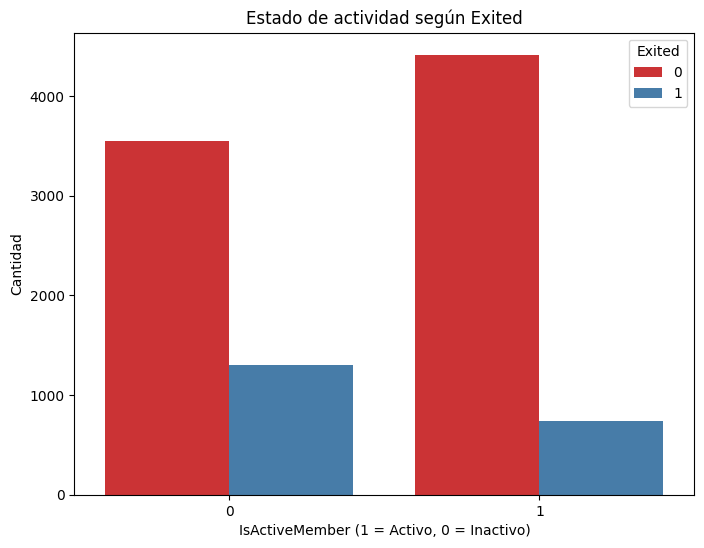

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set1')
plt.title('Estado de actividad según Exited')
plt.xlabel('IsActiveMember (1 = Activo, 0 = Inactivo)')
plt.ylabel('Cantidad')
plt.legend(title='Exited')
plt.show()
